In [4]:
import os
os.chdir('G:\\freecloud\\ThinkpadC_space\\Desktop\\资料\\资料\\量化投资：以Python为工具\\Python Quant Book\\part 4\\023')

In [5]:
import pandas as pd
from statsmodels.tsa import stattools
from statsmodels.graphics.tsaplots import *
import matplotlib.pyplot as plt
import math
from matplotlib.font_manager import FontProperties
font=FontProperties(fname='C:\Windows\Fonts\msyh.ttf')
import numpy as np
from arch.unitroot import ADF

# 读取数据

In [6]:
data=pd.read_table('TRD_Index.txt',sep='\t',index_col='Trddt')
data.head()

,Indexcd,Daywk,Opnindex,Hiindex,Loindex,Clsindex,Retindex
Trddt,,,,,,,
2014/1/2,1,4,2112.126,2113.110,2101.016,2109.387,-0.003115
2014/1/3,1,5,2101.542,2102.167,2075.899,2083.136,-0.012445
2014/1/6,1,1,2078.684,2078.684,2034.006,2045.709,-0.017967
2014/1/7,1,2,2034.224,2052.279,2029.246,2047.317,0.000786
2014/1/8,1,3,2047.256,2062.952,2037.110,2044.340,-0.001454


# test=data.Clsindex
# 提取上证综指数据

In [7]:
SHindex=data[data.Indexcd==1]

# 转换成时间序列类型

In [8]:
SHindex.index=pd.to_datetime(SHindex.index)
SHRet=SHindex.Retindex
type(SHRet)

pandas.core.series.Series

In [9]:
SHRet.head()

Trddt
2014-01-02   -0.003115
2014-01-03   -0.012445
2014-01-06   -0.017967
2014-01-07    0.000786
2014-01-08   -0.001454
Name: Retindex, dtype: float64

In [10]:
SHRet.tail()

Trddt
2015-04-08    0.008440
2015-04-09   -0.009331
2015-04-10    0.019400
2015-04-13    0.021665
2015-04-14    0.003360
Name: Retindex, dtype: float64

# 计算自相关系数

In [11]:
acfs=stattools.acf(SHRet)
acfs[:5]

array([ 1.        ,  0.03527714, -0.01178861, -0.02953388,  0.16043181])

In [12]:
import matplotlib.pyplot as plt 
import matplotlib

# 绘制自相关系数图

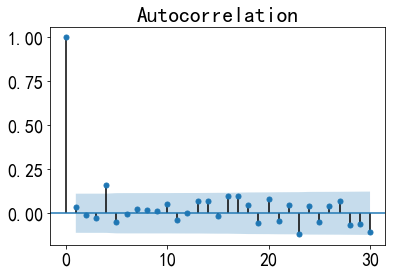

In [13]:
%matplotlib inline
matplotlib.rcParams['axes.unicode_minus']=False
plt.rc('font', family='SimHei', size=18)
plt.figure(figsize=(14,10),dpi=80) 
plot_acf(SHRet,use_vlines=True,lags=30)
plt.show()

# 计算偏自相关系数

In [14]:
pacfs=stattools.pacf(SHRet)
pacfs[:5]

array([ 1.        ,  0.03539094, -0.01313388, -0.02897258,  0.16483494])

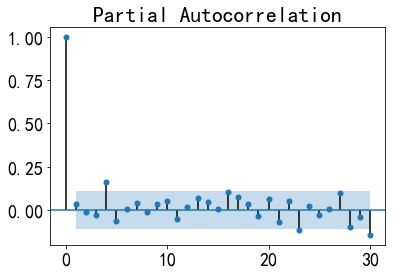

In [15]:
%matplotlib inline
matplotlib.rcParams['axes.unicode_minus']=False
plt.rc('font', family='SimHei', size=18)
plt.figure(figsize=(14,10),dpi=80) 
plot_pacf(SHRet,use_vlines=True,lags=30)
plt.show()

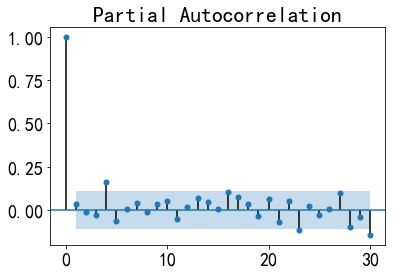

In [16]:
SHclose=SHindex.Clsindex
%matplotlib inline
matplotlib.rcParams['axes.unicode_minus']=False
plt.rc('font', family='SimHei', size=18)
plt.figure(figsize=(14,10),dpi=80) 
plot_pacf(SHRet,use_vlines=True,lags=30)
plt.show()

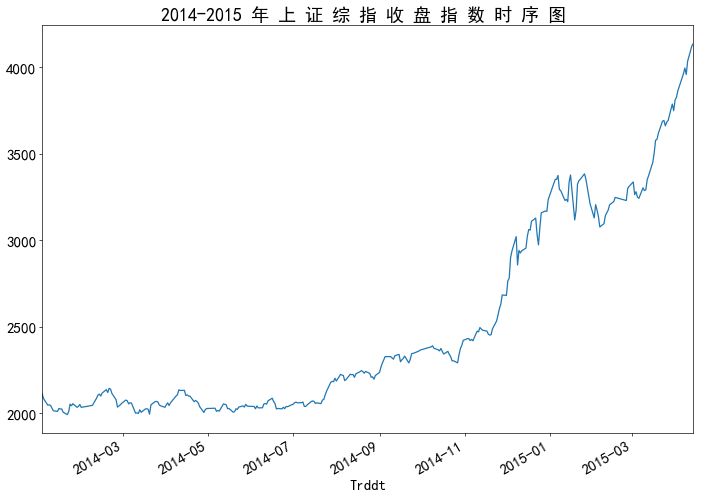

In [17]:
%matplotlib inline
matplotlib.rcParams['axes.unicode_minus']=False
plt.rc('font', family='SimHei', size=18)
plt.figure(figsize=(14,10),dpi=60) 
SHclose.plot()
plt.title('2014-2015 年 上 证 综 指 收 盘 指 数 时 序 图 ')
plt.show()

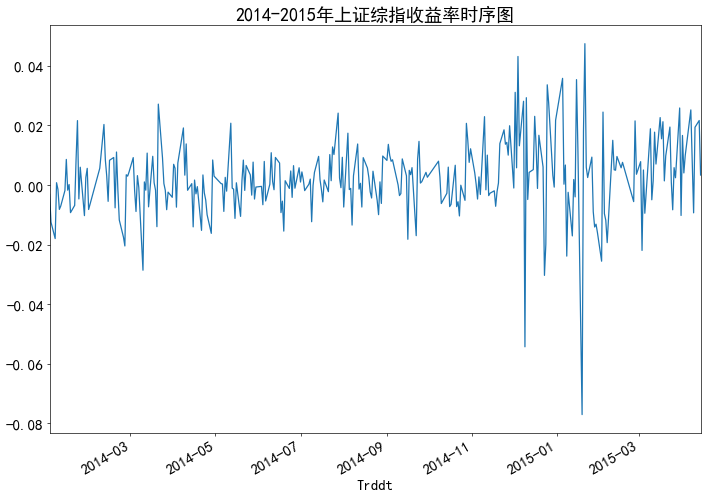

In [18]:
%matplotlib inline
matplotlib.rcParams['axes.unicode_minus']=False
plt.rc('font', family='SimHei', size=18)
plt.figure(figsize=(14,10),dpi=60) 
SHRet.plot()
plt.title('2014-2015年上证综指收益率时序图')
plt.show()

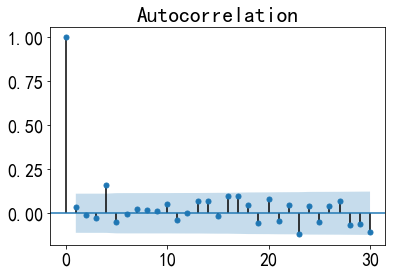

In [19]:
plot_acf(SHRet,use_vlines=True,lags=30)
plt.show()

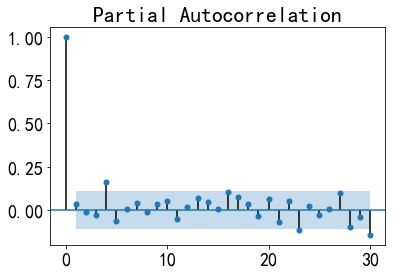

In [20]:
plot_pacf(SHRet,use_vlines=True,lags=30)
plt.show()

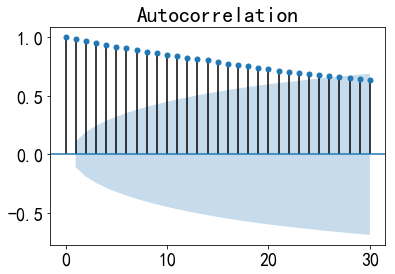

In [21]:
plot_acf(SHclose,use_vlines=True,lags=30)
plt.show()

In [22]:
adfSHRet=ADF(SHRet)
print(adfSHRet.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -7.559
P-value                         0.000
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [23]:
adfSHclose=ADF(SHclose)
print(adfSHclose.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                  2.549
P-value                         0.999
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


# 生成纯随机序列

In [24]:
whiteNoise=np.random.standard_normal(size=500)

# 绘制序列图

Text(0.5,1,'White Noise')

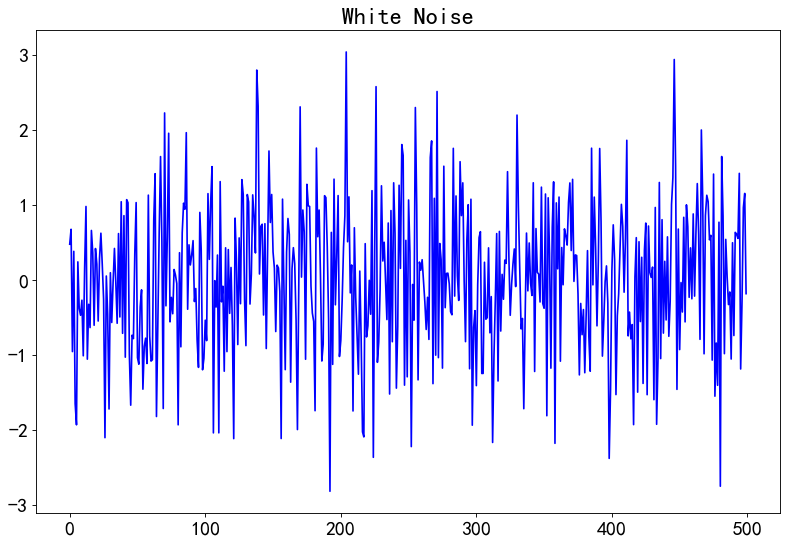

In [25]:
plt.figure(figsize=(12,8),dpi=80) 
plt.plot(whiteNoise,c='b')
plt.title('White Noise')

In [26]:
LjungBox1=stattools.q_stat(stattools.acf(SHRet)[1:13],len(SHRet))
LjungBox1

(array([  0.39077768,   0.43455722,   0.7102307 ,   8.87130492,
          9.68869854,   9.69861023,   9.90782614,  10.00770409,
         10.05187169,  10.90544768,  11.41474472,  11.41630878]),
 array([ 0.53189091,  0.80470574,  0.87079499,  0.06439799,  0.08455194,
         0.13793151,  0.19385734,  0.26448561,  0.34630225,  0.36493184,
         0.40919934,  0.4936175 ]))

In [27]:
LjungBox1[1][-1]

0.49361749645029318

In [28]:
LjungBox2=stattools.q_stat(stattools.acf(SHclose)[1:13],len(SHRet))
LjungBox2[1][-1]

0.0

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
import os
os.chdir('G:\\freecloud\\ThinkpadC_space\\Desktop\\资料\\资料\量化投资：以Python为工具\\PythonANS')

# 5.读取IBM部分日回报数据
# ①绘制其时间序列图

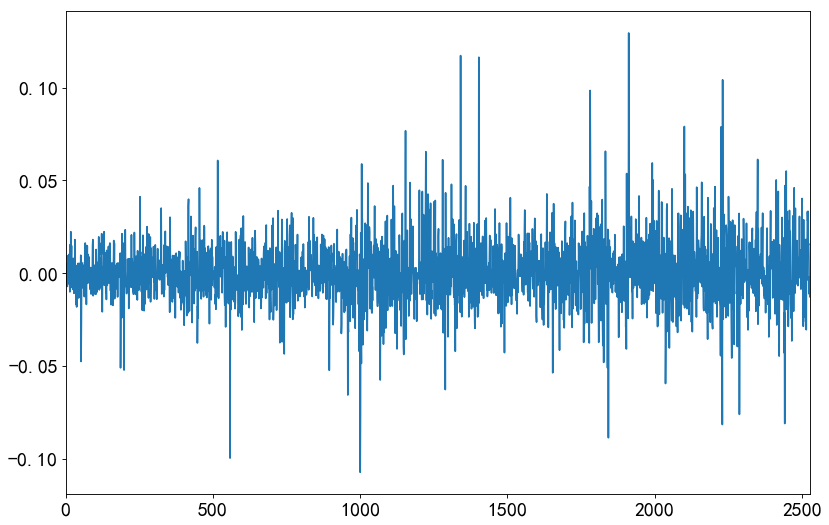

In [31]:
CRSPday=pd.read_csv('Data/Part4/002/CRSPday.csv')
ibm=CRSPday.ibm
plt.figure(figsize=(12,8),dpi=80) 
ibm.plot()

# ②绘制ACF图并判断其是否是白噪声

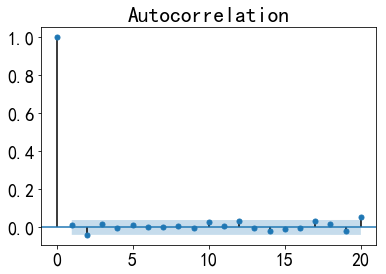

In [32]:
from statsmodels.graphics.tsaplots import *
plot_acf(ibm,lags=20)
plt.show()

# ③使用LjungBox检验判断IBM的日回报率是不是白噪声

In [33]:
from statsmodels.tsa import stattools
LjungBox=stattools.q_stat(stattools.acf(ibm)[1:13],len(ibm))
LjungBox[1][-1] 

0.47767342041175143

# 6.读取通用电气的日回报率数据
# ①绘制其时间序列图

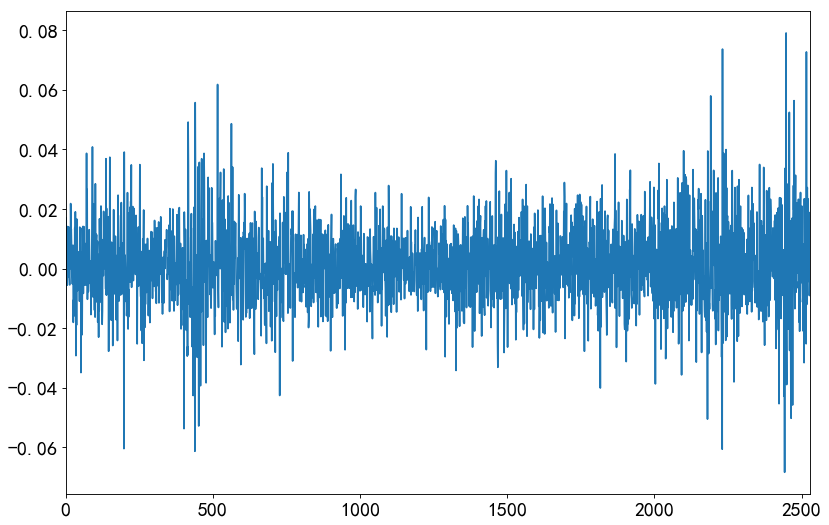

In [34]:
ge=CRSPday.iloc[:,3]
plt.figure(figsize=(12,8),dpi=80)
ge.plot() 

# ②绘制ACF图并判断其是否是白噪声

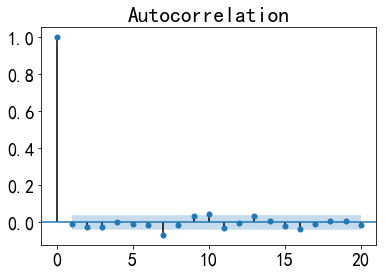

In [35]:
plot_acf(ge,lags=20)
plt.show()

# ③使用LjungBox检验判断日回报率是不是白噪声，lag=2

In [36]:
LjungBox=stattools.q_stat(stattools.acf(ge)[1:2],len(ge))
LjungBox[1][-1]

0.63415629590274136

# ④使用LjungBox检验判断日回报率是不是白噪声，lag=9

In [37]:
LjungBox=stattools.q_stat(stattools.acf(ge)[1:9],len(ge))
LjungBox[1][-1]

0.038343684289074531

# 7.读取标普500指数的日回报率数据
# ①绘制其时间序列图，判断其是否平稳

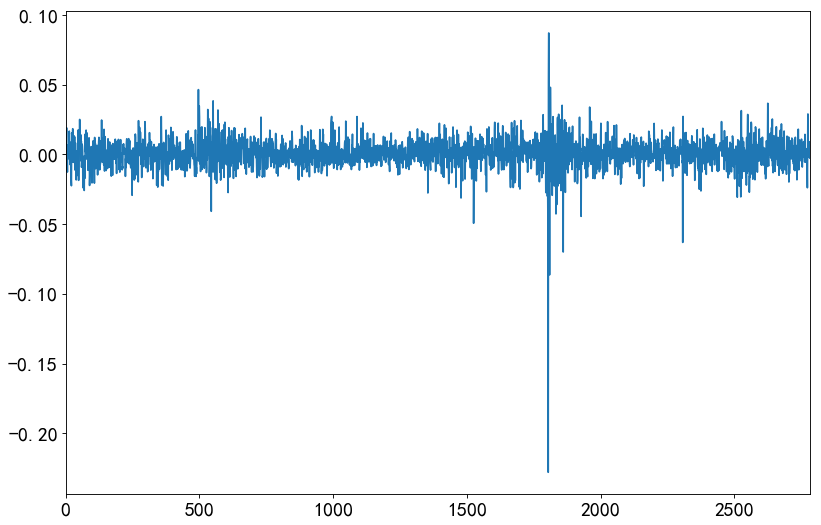

In [38]:
SP500=pd.read_csv('Data/Part4/002/SP500.csv')
r500=SP500.r500
plt.figure(figsize=(12,8),dpi=80)
r500.plot() 

# ②绘制ACF图与PACF图并判断其是否是白噪声

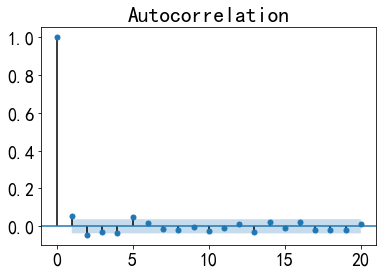

In [39]:
plot_acf(r500,lags=20)
plt.show()

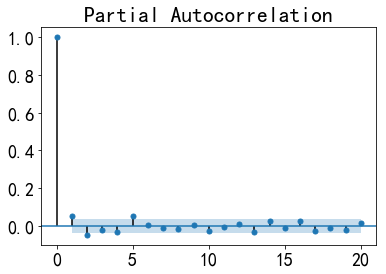

In [40]:
plot_pacf(r500,lags=20)
plt.show()

# ③使用ADF检验验证①的判断

In [41]:
from arch.unitroot import ADF
adf=ADF(r500,lags=3)
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -28.096
P-value                         0.000
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
